## 🔥 神经网络图像分类完整教程 - FashionMNIST篇

> 姐妹们！今天带来超详细的PyTorch入门教程，手把手教你用神经网络识别服装图片！零基础也能看懂～ ✨



## 📚 第一步：导入必要的库

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

**💡 小贴士：这些库都是干什么用的？**
- `torch`: PyTorch的核心库，就像做菜的锅一样必不可少
- `nn`: 神经网络模块，里面有各种现成的网络层
- `DataLoader`: 数据加载器，帮我们批量处理数据
- `datasets`: 内置数据集，FashionMNIST就在里面
- `ToTensor`: 把图片转换成PyTorch能理解的格式

---

## 🎯 第二步：数据处理Pipeline

### 📥 准备数据集

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

len(training_data), len(test_data)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.93MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


(60000, 10000)

**🌟 这段代码在做什么？**
- FashionMNIST是一个服装图片数据集，包含10种不同的服装类型
- `train=True`：下载训练集（60000张图片）
- `train=False`：下载测试集（10000张图片）
- `download=True`：如果本地没有就自动下载
- `transform=ToTensor()`：把PIL图片转换成张量格式

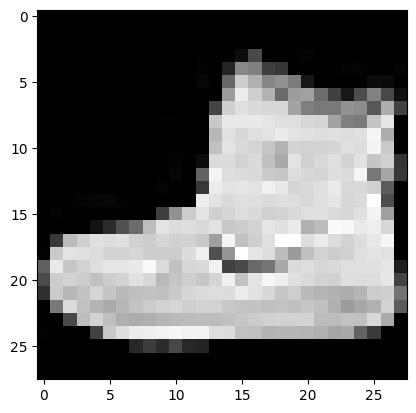

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [3]:
training_data[0][0].shape, training_data[0][1]

# 可视化单个样本
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0].squeeze(), cmap="gray")
plt.show()

training_data[0][0]

**📸 看看我们的数据长什么样**
- `training_data[0][0]`：第一张图片的像素数据
- `training_data[0][1]`：第一张图片的标签（0-9代表不同服装）
- `squeeze()`：去掉多余的维度
- `cmap="gray"`：用灰度显示图片

### 🔄 准备数据加载器

In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

**💭 为什么要用DataLoader？**
- 一次处理64张图片，而不是一张一张来
- 就像批量洗衣服一样，效率更高！
- 自动打乱数据顺序，让训练更有效

### 🔍 检查数据格式

In [5]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

y

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])

**📊 数据维度解析**
- `X.shape`: [64, 1, 28, 28]
  - 64：批次大小（一次处理64张图）
  - 1：通道数（灰度图只有1个通道）
  - 28×28：图片尺寸
- `y.shape`: [64] 表示64个标签

---

## 💻 第三步：确认设备情况

In [6]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


**⚡ 设备选择优先级**
1. CUDA (NVIDIA显卡) - 最快 🚀
2. MPS (Apple芯片) - 还不错 🍎
3. CPU - 最慢但最稳定 🐌

---

## 🧠 第四步：构建神经网络模型

In [7]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model(X.to(device)).shape)
print(model)

torch.Size([64, 10])
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


**🏗️ 网络结构详解**
- `nn.Flatten()`: 把28×28的图片拉平成784个数字
- `nn.Linear(784, 512)`: 全连接层，784个输入→512个输出
- `nn.ReLU()`: 激活函数，让网络能学习复杂模式
- `nn.Linear(512, 512)`: 第二个全连接层
- `nn.Linear(512, 10)`: 输出层，10个类别对应10种服装

**💡 为什么是这样的结构？**
- 就像一个漏斗：784→512→512→10
- 逐渐压缩信息，最后得到10个分类的概率

---

## 📐 第五步：定义损失函数和优化器

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

**🎯 核心组件解释**
- `CrossEntropyLoss`: 多分类问题的标准损失函数
- `SGD`: 随机梯度下降优化器，学习率设为0.001
- 就像GPS导航一样，告诉模型朝哪个方向调整参数

---

## 🏋️ 第六步：训练和评估函数



In [9]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

**🔄 训练流程详解**
1. `model.train()`: 告诉模型现在要训练了
2. 前向传播：输入图片→得到预测结果
3. 计算损失：预测结果和真实标签的差距
4. 反向传播：`loss.backward()`计算梯度
5. 更新参数：`optimizer.step()`
6. 清空梯度：`optimizer.zero_grad()`为下次做准备


In [10]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

**📊 评估过程解析**
- `model.eval()`: 切换到评估模式
- `torch.no_grad()`: 不计算梯度，节省内存
- `pred.argmax(1)`: 找出概率最大的类别
- 计算准确率和平均损失

---

## 🚀 第七步：开始训练！

In [11]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297701  [   64/60000]
loss: 2.284227  [ 6464/60000]
loss: 2.267975  [12864/60000]
loss: 2.264516  [19264/60000]
loss: 2.245345  [25664/60000]
loss: 2.212929  [32064/60000]
loss: 2.222292  [38464/60000]
loss: 2.177181  [44864/60000]
loss: 2.178102  [51264/60000]
loss: 2.148859  [57664/60000]
Test Error: 
 Accuracy: 50.9%, Avg loss: 2.140877 

Epoch 2
-------------------------------
loss: 2.153103  [   64/60000]
loss: 2.132448  [ 6464/60000]
loss: 2.073663  [12864/60000]
loss: 2.093537  [19264/60000]
loss: 2.026109  [25664/60000]
loss: 1.974825  [32064/60000]
loss: 2.001229  [38464/60000]
loss: 1.910711  [44864/60000]
loss: 1.924567  [51264/60000]
loss: 1.848829  [57664/60000]
Test Error: 
 Accuracy: 53.1%, Avg loss: 1.844789 

Epoch 3
-------------------------------
loss: 1.887542  [   64/60000]
loss: 1.840781  [ 6464/60000]
loss: 1.726389  [12864/60000]
loss: 1.769647  [19264/60000]
loss: 1.651845  [25664/60000]
loss: 1.624814  [32064/600

**⏰ Epoch是什么？**
- 1个epoch = 把所有训练数据过一遍
- 训练5个epoch，模型会越来越聪明！
- 每个epoch后都测试一下，看看进步了多少

---

## 💾 第八步：保存和加载模型



### 保存模型

In [12]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### 加载模型

In [13]:
len(torch.load("model.pth", weights_only=True))

torch.load("model.pth", weights_only=True)['linear_relu_stack.0.weight'].shape

torch.load("model.pth", weights_only=True)

model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

**💡 模型保存小知识**
- `state_dict()`: 只保存模型参数，不保存结构
- 加载时需要先创建相同的模型结构
- `weights_only=True`: 只加载权重，更安全

---

## 🎉 第九步：模型预测

In [14]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


**🔮 预测过程解析**
- 定义10个服装类别的名称
- 取一张测试图片进行预测
- `argmax(0)`: 找出概率最高的类别索引
- 输出预测结果和真实标签

---

## 🌟 总结

这个教程带你完整体验了深度学习的全流程：
1. **数据准备** - 下载和预处理图片
2. **模型构建** - 设计神经网络结构
3. **训练过程** - 让模型学习识别服装
4. **模型评估** - 测试识别准确率
5. **保存加载** - 持久化训练成果
6. **实际预测** - 用训练好的模型识别新图片

**🎯 小tips**
- 第一次运行可能需要下载数据，耐心等待～
- GPU训练会比CPU快很多倍
- 可以尝试调整网络结构和参数，看看效果如何变化

**💪 恭喜你！**
你已经掌握了PyTorch深度学习的基础流程，可以尝试其他数据集和更复杂的模型了！